In [28]:
import numpy as np
import pandas as pd
import gzip
import codecs
import chardet
import math


In [29]:
def compute_cost(features, values, theta):
    """
    Compute the cost of a list of parameters, theta, given a list of features 
    (input data points) and values (output data points).
    """
    
    m = len(values)
    h =  np.dot(features, theta) 
    
    #h = np.add(h,bias)
    loss = np.log(h +1) - np.log(values +1)
    squares = np.square(loss)
    sum_of_square_errors = squares.sum()   
    sumcost = (sum_of_square_errors/2*m) 
    t = h + 1 
         
################    
    part1 = 1/sum_of_square_errors
    part2 = part1*features.T
    f = (part2.dot(np.divide(loss,t))/m) 
################    
   
    return  sumcost , f
    


In [30]:
def gradient_descent(features, values, theta,alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    """

    # Write code here that performs num_iterations updates to the elements of theta.
    # times. Every time you compute the cost for a given list of thetas, append it 
    # to cost_history.
    
    
    cost_history = []
    
   
    for k in range(num_iterations): 
        cost,f = compute_cost(features,values,theta)

        if math.isnan(cost) == True or math.isinf(cost) == True:
            break
        
        cost_history.append([cost,f])
        
        theta = theta - alpha*f # we need alpha as parameter in this way
        
    
    
    return theta , pd.DataFrame(cost_history,columns=['cost','gradients']) 


In [31]:
def process(new) :
    primary = []
    for dat in new :
        sublist = []
        for el in dat:
            attr = ''
            for k in range(len(el)):
                if el[k] == '>' and el[k-1] == '"' :
                    while el[k+1]!='<' :
                        k = k+1
                        attr = attr + el[k]
                    if attr[0]=='0' or attr[0]=='1' or attr[0]=='2' or attr[0]=='3' or attr[0]=='4' or attr[0]=='5' or attr[0] =='6' or attr[0]=='7' or attr[0]=='8' or attr[0]=='9' :
                        
                        attr = float(attr)
                    sublist.append(attr)
            
        primary.append(sublist)
    return primary
    

In [32]:
import io
import json
path = '/home/pagoulid/Desktop/Gradient/beer.csv'
with open(path,"rb") as fd :
    gzip_fd = gzip.GzipFile(fileobj=fd)

    df = pd.read_csv(gzip_fd, engine = 'c',encoding = 'utf-8', header=None)
    df.to_csv('/home/pagoulid/Desktop/Gradient/test.csv')
    labels = df[116:122]
    labels =labels[0].tolist()
    labels = labels[2:]
    print(labels[0])
    raw = df[123:2677]
    raw = raw[0].tolist()
    new = []
    start = 0
    for k in range(2555) :
        last = 7*(k + 1)    
        new.append(raw[start:last])
        start = last
        if last == 2555 :
            break
    
    X = process(new)
    col = ['Date','Tempmed','Tempmin','Tempmax','Precipetated','Final','Consume']
    Frame = pd.DataFrame(X,columns = col)
    Frame = Frame.fillna(Frame.mean())
    xdata = Frame[col[1:len(col)-1]]
    print(xdata.head())
 

        <gnm:Cell Row="0" Col="2" ValueType="60">Tempmin</gnm:Cell>
   Tempmed  Tempmin  Tempmax  Precipetated  Final
0    27.30     23.9     32.5           0.0    0.0
1    27.02     24.5     33.5           0.0    0.0
2    24.82     22.4     29.9           0.0    1.0
3    23.98     21.5     28.6           1.2    1.0
4    23.82     21.0     28.3           0.0    0.0


In [33]:
print(Frame['Consume'].head())

0    25.461
1    28.972
2    30.814
3    29.799
4    28.900
Name: Consume, dtype: float64


In [34]:
def minmaxprocess(xbar) :
    # test for minmaxscaler scaling

    '''
    plt.plot(xbar.max(axis = 0),'o')
    plt.plot(xbar.min(axis = 0),'^')
    '''
    # large differences on each feature range of magnitude
    # test for minmaxscaler scaling
    mn = xbar.min(axis = 0)
    xrange = (xbar - mn).max(axis = 0)
    xscaled = (xbar - mn)/xrange
    '''
    plt.figure()
    plt.plot(xscaled.max(axis = 0),'o')
    plt.plot(xscaled.min(axis = 0),'^')
    '''
    return xscaled

    

In [35]:
def standard(xbar) :
    norm = (xbar - xbar.mean())/(xbar.std())
    print('standard size',norm.shape)
    return norm
    

In [36]:
    from sklearn.model_selection import train_test_split
    
    newx = xdata.values
    y =Frame['Consume'].values
    y = y.T
   
    pre_x_train, pre_x_test, y_train, y_test = train_test_split(
         newx, y, test_size=0.15, random_state=42)
    
    
    x_train=pre_x_train
    x_test= pre_x_test
    
    #x_train=minmaxprocess(pre_x_train)
    #x_test= minmaxprocess(pre_x_test)
    
     #x_train=standard(pre_x_train)
    #x_test= standard(pre_x_test)
    
    coeff = np.zeros(x_train.shape[1]) # init weights
    
   
        
    
    a = 1.0 # learning rate
    num = 80000 # iterations
    #print(y_train)
    costs , hist = gradient_descent(x_train, y_train, coeff,a, num)
    print(hist)
    print(costs)
    

                cost                                          gradients
0      510635.507529  [-0.020991352863089986, -0.017195971208676865,...
1      267749.370877  [-0.011636287924215104, -0.00953410608264786, ...
2      207513.128815  [-0.009943753055829244, -0.008146854660111249,...
3      171222.371669  [-0.009035338435701796, -0.007401996291217008,...
4      145745.482566  [-0.00845165261049704, -0.006923206863500698, ...
...              ...                                                ...
79995     425.947650  [4.4720533296072956e-08, -2.247087083250581e-0...
79996     425.947650  [4.471639825799488e-08, -2.2468793860835443e-0...
79997     425.947650  [4.4712263639971705e-08, -2.2466717050214563e-...
79998     425.947650  [4.470812937301179e-08, -2.2464640452091716e-0...
79999     425.947650  [4.4703995491966294e-08, -2.246256404396026e-0...

[80000 rows x 2 columns]
[ 0.20329286  0.11408235  0.67208538 -0.05428879  5.56792899]


In [37]:
print(coeff)

[0. 0. 0. 0. 0.]


In [38]:
    from sklearn.metrics import r2_score
    ypred = x_train.dot(costs)
    
    ytrain = np.round(y_train,0)
    ypred = np.round(ypred,0)
    print('Accuracy : ', r2_score(ytrain,ypred))

Accuracy :  0.6567900611744888


In [39]:
   
    test = pd.DataFrame({'origin':ytrain,'predict':ypred},columns =['origin','predict'])
    print(test.head())
    test.to_csv('/home/pagoulid/Desktop/opttrresbeer2.csv')

   origin  predict
0    30.0     26.0
1    33.0     32.0
2    30.0     32.0
3    22.0     27.0
4    24.0     25.0


In [40]:
    
    typred = x_test.dot(costs)
    
    ytest = np.round(y_test,0)
    typred = np.round(typred,0)
    diff =np.abs((typred - ytest)).sum()/y_test.size
    
    print('Accuracy : ', r2_score(ytest,typred))
    

Accuracy :  0.7113917871743243


In [41]:
    test1 = pd.DataFrame({'origin':ytest,'predict':typred},columns =['origin','predict'])
    print(test1.head())
    test1.to_csv('/home/pagoulid/Desktop/minmaxbeer.csv')

   origin  predict
0    26.0     26.0
1    32.0     28.0
2    30.0     30.0
3    21.0     21.0
4    26.0     28.0


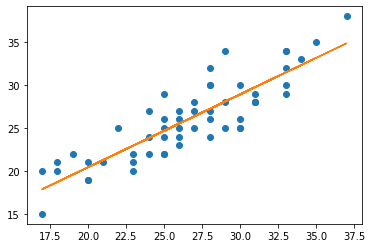

In [42]:
    import matplotlib.pyplot as plt
    import pylab as p
    yp = np.linspace(16,36,100)
    m , b = np.polyfit(test1['predict'].values, test1['origin'].values, 1)
    plt.plot(test1['predict'].values, test1['origin'].values, 'o')
    plt.plot(test1['predict'].values, m*test1['predict'].values + b)

In [43]:
def eval_range(data): # look at what range of values i have a good estimation e.g. If ytrue included in a range of
                    #(ypred-2,ypred+2) is this a good estimation??
    df = pd.DataFrame(columns = ['In_range','Count','Total'])
    arange=[0,1,2,3,4,5]
    for r in range(len(arange)):
        count = 0
        for origin,predict in zip(data['origin'],data['predict']):
        
                
                for k in range(r+1):
                    
                    if (int(origin) == int(predict)+k or int(origin) == int(predict)-k):
                        count = count+1
                        break
    
    
        row = {'In_range':r,'Count':count,'Total':len(data)}
        df=df.append(pd.Series(row),ignore_index=True)
    return df
new_test = eval_range(test1)
new_train = eval_range(test)
new_test.head()


,In_range,Count,Total
0,0,7,55
1,1,23,55
2,2,33,55
3,3,46,55
4,4,52,55


In [44]:
new_train.head()

,In_range,Count,Total
0,0,38,310
1,1,120,310
2,2,195,310
3,3,254,310
4,4,293,310
